#Analyzing ratings in general

In [23]:
import pandas as pd

notas = pd.read_csv("ratings.csv")
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [24]:
notas.shape

(100836, 4)

In [25]:
notas.columns = ["usuarioId", "filmeId", "nota", "momento"]
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [26]:
notas["nota"]

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

In [27]:
notas["nota"].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [28]:
notas["nota"].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [29]:
print("Media:", notas.nota.mean())
print("Mediana:", notas.nota.median())

Media: 3.501556983616962
Mediana: 3.5


In [30]:
notas.nota.head()

0    4.0
1    4.0
2    4.0
3    5.0
4    5.0
Name: nota, dtype: float64

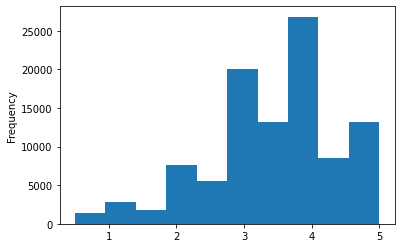

In [31]:
notas.nota.plot(kind='hist')

In [32]:
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


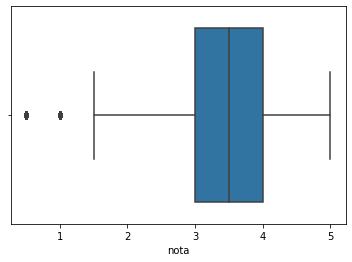

In [33]:
import seaborn as sns

sns.boxplot(notas.nota)


#Analyzing specific movie ratings

In [34]:
filmes = pd.read_csv("movies.csv")

filmes.columns = ["filmeId", "titulo", "generos"]
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [35]:
notas.query("filmeId==1").nota.mean()

3.9209302325581397

In [36]:
notas.query("filmeId==2").nota.mean()

3.4318181818181817

In [37]:
# outra forma de usar o groupby com coluna especifica:
# notas.groupby("filmeId").mean()["nota"]
medias_por_filme = notas.groupby("filmeId").nota.mean()

AxesSubplot(0.125,0.125;0.775x0.755)


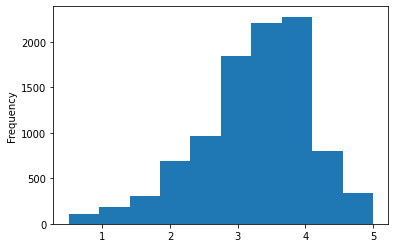

In [38]:
print(medias_por_filme.plot(kind='hist'))

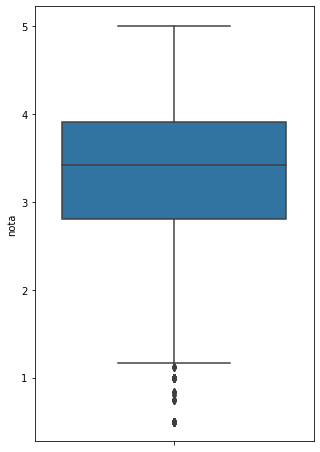

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,8))
sns.boxplot(y = medias_por_filme)

In [40]:
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


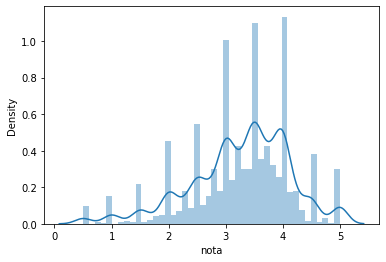

In [41]:
sns.distplot(medias_por_filme)

Text(0.5, 1.0, 'Histograma das médias dos filmes')

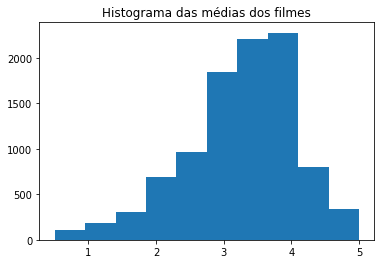

In [42]:
plt.hist(medias_por_filme)
plt.title("Histograma das médias dos filmes")

In [43]:
tmdb = pd.read_csv("tmdb_5000_movies.csv")
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [44]:
tmdb.original_language.unique() # categorica nominal

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [45]:
# categorica ordinal

# primeiro grau
# segundo grau
# terceiro grau
# 1 grau < 2 grau < 3 grau 

In [46]:
# budge => orçamento => quantitativo contínuo

In [47]:
# quantidade de votos => 1, 2, 3, 4, não existe 2.5 votos

In [48]:
contagem_de_lingua = tmdb["original_language"].value_counts().to_frame().reset_index()

contagem_de_lingua.columns = ["original_language", "total"]

In [49]:
contagem_de_lingua.value_counts().index

MultiIndex([('af',    1),
            ('ky',    1),
            ('nl',    4),
            ('no',    1),
            ('pl',    1),
            ('ps',    1),
            ('pt',    9),
            ('ro',    2),
            ('ru',   11),
            ('sl',    1),
            ('sv',    5),
            ('ta',    2),
            ('te',    1),
            ('th',    3),
            ('tr',    1),
            ('vi',    1),
            ('xx',    1),
            ('nb',    1),
            ('ko',   11),
            ('ar',    2),
            ('ja',   16),
            ('cn',   12),
            ('cs',    2),
            ('da',    7),
            ('de',   27),
            ('el',    1),
            ('en', 4505),
            ('es',   32),
            ('fa',    4),
            ('fr',   70),
            ('he',    3),
            ('hi',   19),
            ('hu',    1),
            ('id',    2),
            ('is',    1),
            ('it',   14),
            ('zh',   27)],
           names=['original_language'

In [50]:
contagem_de_lingua.value_counts().values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [51]:
contagem_de_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


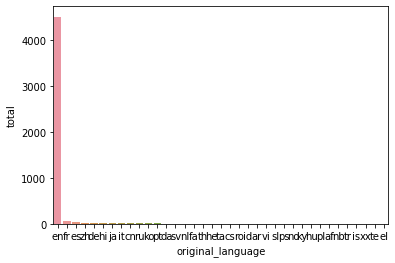

In [52]:
sns.barplot(x= "original_language", y = "total", data = contagem_de_lingua)

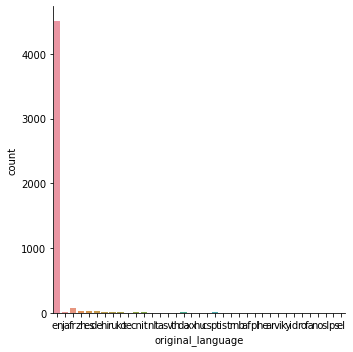

In [53]:
sns.catplot(x = "original_language", kind="count", data = tmdb)

([<matplotlib.patches.Wedge at 0x7fa5733f0450>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'zh'),
  Text(1.0773191105706255, -0.22222406260195313, 'de'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ru'),
  Text(1.0960865535188649, -0.09270527058984593, 'ko'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'nl'),
  Text(1.0990363161210686, -0.04603450713357274, 'fa'),
  Text(1.0992355702663055, -0.04100196411527794, 'th'),
  Text

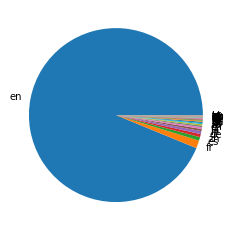

In [54]:
plt.pie(contagem_de_lingua["total"], labels = contagem_de_lingua["original_language"])

In [57]:
total_por_lingua = tmdb["original_language"].value_counts()
total_geral = total_por_lingua.sum()
total_de_ingles = total_por_lingua.loc["en"]
total_de_outras = total_geral - total_de_ingles

print(total_de_ingles, total_de_outras)

4505 298


In [64]:
dados = {
    'lingua': ['ingles', 'outras'],
    'total': [total_de_ingles, total_de_outras]
}

dados = pd.DataFrame(dados)
dados

,lingua,total
0,ingles,4505
1,outras,298


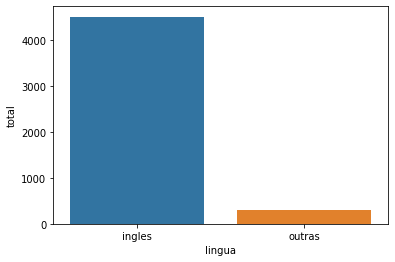

In [65]:
sns.barplot(x = "lingua", y = "total", data = dados)

([<matplotlib.patches.Wedge at 0x7fa572974050>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'ingles'),
  Text(1.0791697511565306, -0.2130555049482467, 'outras')])

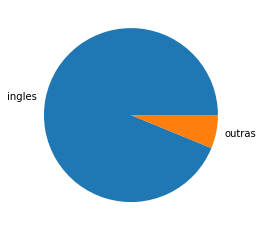

In [66]:
plt.pie(dados["total"], labels = dados["lingua"])

In [70]:
total_por_lingua_de_outros_filmes = tmdb.query("original_language != 'en'").original_language.value_counts()
total_por_lingua_de_outros_filmes

fr    70
es    32
zh    27
de    27
hi    19
ja    16
it    14
cn    12
ko    11
ru    11
pt     9
da     7
sv     5
fa     4
nl     4
he     3
th     3
ro     2
id     2
ar     2
cs     2
ta     2
tr     1
nb     1
af     1
pl     1
is     1
hu     1
vi     1
ky     1
xx     1
te     1
no     1
sl     1
ps     1
el     1
Name: original_language, dtype: int64

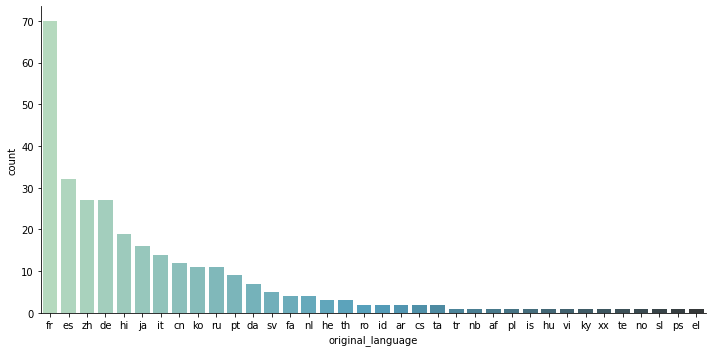

In [89]:
filmes_sem_lingua_original_em_ingles = tmdb.query("original_language != 'en'")

sns.catplot(x = "original_language", 
            kind = "count", 
            data = filmes_sem_lingua_original_em_ingles,
            aspect = 2, 
            palette = "GnBu_d",
            order = total_por_lingua_de_outros_filmes.index)

# Reviewing the role of mean, median, measures of trend, center, dispersion, standard deviation, box plot, histogram

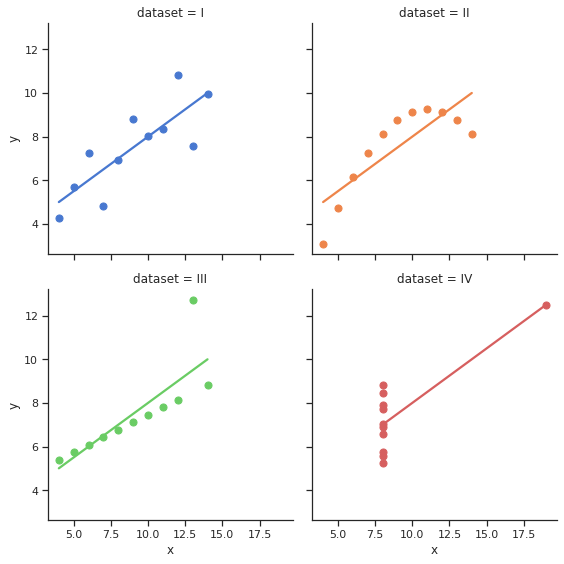

In [91]:
#Apenas para conhecimento
sns.set(style="ticks")

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})

In [92]:
filmes.head(2)

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [120]:
notas_toy_story = notas.query("filmeId==1")
notas_jumanji = notas.query("filmeId==2")

print(len(notas_toy_story), len(notas_jumanji))

215 110


In [96]:
print("Nota média do Toy Story %.2f" % notas_toy_story.nota.mean())
print("Nota média do Jumanji %.2f" % notas_jumanji.nota.mean())

Nota média do Toy Story 3.92
Nota média do Jumanji 3.43


In [98]:
print("Nota média do Toy Story %.2f" % notas_toy_story.nota.median())
print("Nota média do Jumanji %.2f" % notas_jumanji.nota.median())

Nota média do Toy Story 4.00
Nota média do Jumanji 3.50


In [105]:
import numpy as np

filme1 = np.append(np.array([2.5] * 10), np.array([3.5] * 10))
filme2 = np.append(np.array([5] * 10), np.array([1] * 10))

In [124]:
print(filme1.mean(), filme2.mean())
print(np.std(filme1), np.std(filme2))
print(np.median(filme1), np.median(filme2))

3.0 3.0
0.5 2.0
3.0 3.0


(array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

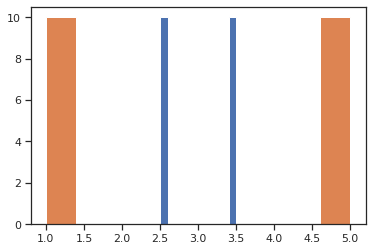

In [109]:
#sns.distplot(filme1)
#sns.distplot(filme2)

plt.hist(filme1)
plt.hist(filme2)

{'boxes': [<matplotlib.lines.Line2D at 0x7fa57122f6d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa571235750>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa57123f790>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa57123f250>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa57122fc90>,
  <matplotlib.lines.Line2D at 0x7fa57124a750>]}

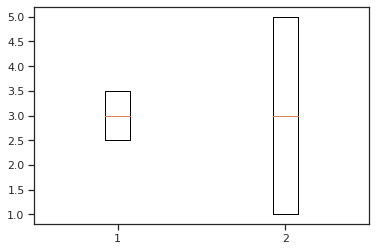

In [113]:
plt.boxplot([filme1, filme2])

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


{'boxes': [<matplotlib.lines.Line2D at 0x7fa5710d4890>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa5710d9910>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa5710e1950>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa5710e1410>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa5710d4e50>,
  <matplotlib.lines.Line2D at 0x7fa5710e9890>]}

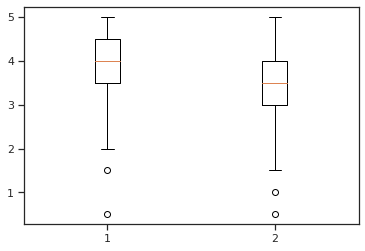

In [115]:
plt.boxplot([notas_toy_story.nota, notas_jumanji.nota])

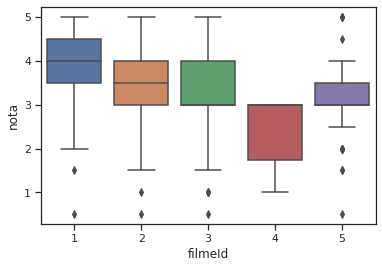

In [119]:
sns.boxplot(x = "filmeId", y = "nota", data = notas.query('filmeId in [1,2,3,4,5]'))

In [123]:
print(notas_toy_story.nota.std(), notas_jumanji.nota.std())

0.8348591407114045 0.8817134921476455
